In [1]:
import pandas as pd

df = pd.read_csv('Data.csv')
df

,Series Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Urban population,Rural population
0,1993,50.900000,38.700000,82.800000,242019983,682037834
1,1994,50.978432,38.432262,85.957431,248732500,693471749
2,1995,52.443676,40.041851,86.652987,255555657,704927138
3,1996,53.898098,41.638618,87.353947,262509794,716383423
4,1997,55.338989,43.219364,88.060363,269578709,727826609
5,1998,56.763645,44.780880,88.770473,276751329,739222713
6,1999,60.100000,48.100000,91.300000,284012050,750527164
7,2000,59.562237,47.845768,90.193940,291347596,761703316
8,2001,55.800000,43.600000,87.600000,299135188,772342667
9,2002,62.300000,50.869453,91.340161,307805121,782001991


In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.rcParams['figure.figsize'] = (10, 8)

In [4]:
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '%dM' % (x*1e-6)

formatter = FuncFormatter(millions)

import matplotlib.patches as mpatches

yel_patch = mpatches.Patch(color= "#fec615", alpha = 0.7, label='Population with access to electricity')
red_patch = mpatches.Patch(color= "#f8481c", alpha = 0.7, label='Population without access to electricity')

<IPython.core.display.Javascript object>


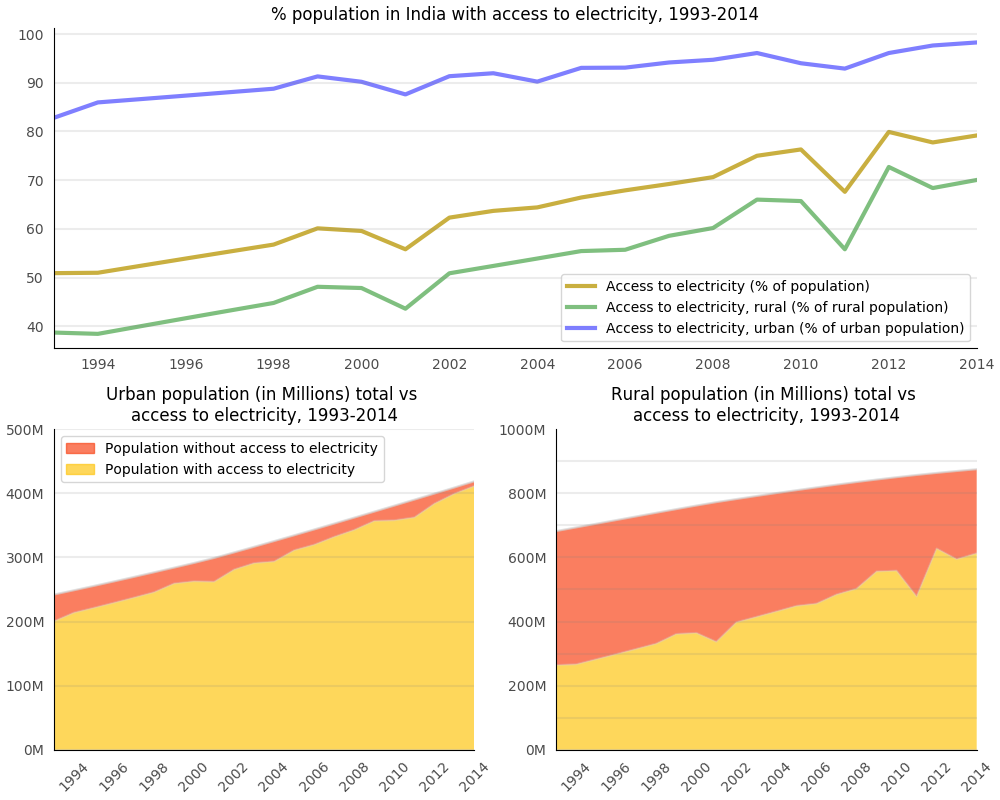

In [5]:
fig = plt.figure()

fig.add_subplot(2,1,1)

range_df = range(df.shape[0])

plt.plot(range_df, df.iloc[0:, 1], linewidth=3, color = '#b79400', alpha=0.75)
plt.plot(range_df, df.iloc[0:, 2], linewidth=3, color = 'green', alpha=0.5)
plt.plot(range_df, df.iloc[0:, 3], linewidth=3, color = 'blue', alpha=0.5)

x_label = np.arange(1994, 2015, 2)
plt.xticks(range(1, df.shape[0], 2), x_label, alpha=0.7)
plt.yticks(alpha=0.7)
plt.margins(x=0)
plt.legend()
plt.title('% population in India with access to electricity, 1993-2014')
plt.tick_params(left = 'off', bottom = 'off')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for i in range(40, 101, 10):
    plt.gca().axhline(y=i, color='grey', alpha=0.15)


In [6]:
urb =np.array(df.iloc[0:, 3])
urb_pop =np.array(df.iloc[0:, 4])
for i in range(len(urb_pop)):
    urb[i] = urb[i]*urb_pop[i]/100
urb = urb.astype(int)

fig.add_subplot(2,2,3)

plt.plot(range_df, urb_pop, color = "lightgrey", alpha = 0.7)
plt.plot(range_df, urb, color = "lightgrey", alpha = 0.3)
plt.axis([0,21,0,500000000])
x_label = np.arange(1994, 2015, 2)
plt.xticks(range(1, df.shape[0], 2), x_label, rotation=45, alpha=0.7)
plt.gca().yaxis.set_major_formatter(formatter)
plt.yticks(alpha=0.7)
plt.legend(handles=[red_patch, yel_patch], loc=2)
plt.title('Urban population (in Millions) total vs \naccess to electricity, 1993-2014')
plt.tick_params(left = 'off', bottom = 'off')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
00
for i in range(0, 500000001, 100000000):
    plt.gca().axhline(y=i, color='grey', alpha=0.15)
    
plt.gca().fill_between(range_df, 0 , urb, facecolor = "#fec615", alpha = 0.7)
plt.gca().fill_between(range_df, urb , urb_pop, facecolor = "#f8481c", alpha = 0.7)

In [7]:
rur =np.array(df.iloc[0:, 2])
rur_pop =np.array(df.iloc[0:, 5])
for i in range(len(rur_pop)):
    rur[i] = rur[i]*rur_pop[i]/100
rur = rur.astype(int)

fig.add_subplot(2,2,4)

plt.plot(range_df, rur_pop, color = "lightgrey", alpha = 0.7)
plt.plot(range_df, rur, color = "lightgrey", alpha = 0.3)
plt.axis([0,21,0,1000000000])
x_label = np.arange(1994, 2015, 2)
plt.xticks(range(1, df.shape[0], 2), x_label, rotation=45, alpha=0.7)
plt.gca().yaxis.set_major_formatter(formatter)
plt.yticks(alpha=0.7)
#plt.legend(handles=[red_patch, yel_patch], loc=2)
plt.title('Rural population (in Millions) total vs \naccess to electricity, 1993-2014')
plt.tick_params(left = 'off', bottom = 'off')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for i in range(0, 900000001, 100000000):
    plt.gca().axhline(y=i, color='grey', alpha=0.15)
    
plt.gca().fill_between(range_df, 0 , rur, facecolor = "#fec615", alpha = 0.7)
plt.gca().fill_between(range_df, rur , rur_pop, facecolor = "#f8481c", alpha = 0.7)

In [8]:
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.savefig('img.png')